In [3]:
from sklearn import datasets as ds
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [67]:
class LinearRegression:
    def __init__(self):
        #self.built = False
        pass
    
    def fit(self, X, y, loss_function, epochs=1, learning_rate=0.1):
        ## Weight initialization
        #if not self.built:
        self.W = np.random.normal(size=(X.shape[1],1)) * 0.1
        self.b = np.zeros(shape=(1))
        self.A = X
            
        y = np.expand_dims(y, axis=-1)
        ## Training
        for epoch in range(epochs):
            
            Z = np.dot(X, self.W) + self.b
            loss = loss_function(y, Z)
            print(f"Epoch: {epoch+1} Loss: {loss}")
            self.backProp(y, Z)
            self.optimize(learning_rate)
            
        
    
    def backProp(self, y, Z):
        m = y.shape[0]
        dZ = -2*(y-Z)
        self.dW = 1/m * np.dot(self.A.T, dZ)
        self.db = 1/m * np.sum(dZ, axis=0)        
    
    def optimize(self, lr):
        self.W = self.W - lr*self.dW
        self.b = self.b - lr*self.db
    
    def predict(self, X):
        return np.dot(X, self.W) + self.b
    

In [68]:
def mse(y,y_hat):
    m = y.shape[0]
    
    error = 1/m * np.sum((y - y_hat)**2)
    return error

## Make data

In [69]:
X, y = ds.make_regression(n_samples=1000, n_features=3, n_informative=3, n_targets=1, bias=0.5, random_state=41)

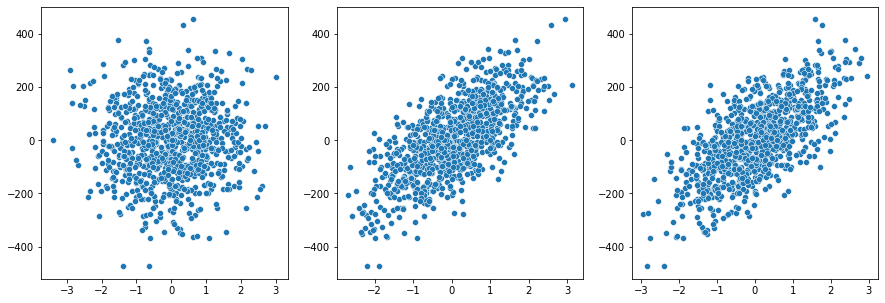

In [70]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(x=X[:,0], y=y)

plt.subplot(1,3,2)
sns.scatterplot(x=X[:,1], y=y)

plt.subplot(1,3,3)
sns.scatterplot(x=X[:,2], y=y)

plt.show()

In [72]:
lr = LinearRegression()
lr.fit(X, y, loss_function=mse, epochs=100, learning_rate=0.01)

Epoch: 1 Loss: 19271.121973461417
Epoch: 2 Loss: 18522.394743656572
Epoch: 3 Loss: 17802.86818624969
Epoch: 4 Loss: 17111.39871917162
Epoch: 5 Loss: 16446.887748797955
Epoch: 6 Loss: 15808.279891483635
Epoch: 7 Loss: 15194.561265769344
Epoch: 8 Loss: 14604.757852435852
Epoch: 9 Loss: 14037.93391969597
Epoch: 10 Loss: 13493.190510922688
Epoch: 11 Loss: 12969.663992416537
Epoch: 12 Loss: 12466.52465881551
Epoch: 13 Loss: 11982.975393847075
Epoch: 14 Loss: 11518.250384214201
Epoch: 15 Loss: 11071.613884495862
Epoch: 16 Loss: 10642.359031027507
Epoch: 17 Loss: 10229.806702808726
Epoch: 18 Loss: 9833.304427563397
Epoch: 19 Loss: 9452.225331153002
Epoch: 20 Loss: 9085.967128615746
Epoch: 21 Loss: 8733.951155173403
Epoch: 22 Loss: 8395.621435614199
Epoch: 23 Loss: 8070.443790523816
Epoch: 24 Loss: 7757.904977897739
Epoch: 25 Loss: 7457.5118687269205
Epoch: 26 Loss: 7168.79065520506
Epoch: 27 Loss: 6891.2860902598695
Epoch: 28 Loss: 6624.56075716264
Epoch: 29 Loss: 6368.19436802019
Epoch: 30 L

In [73]:
lr.b

array([0.92831161])